In [3]:
from aart_func import *
from params import * 
import tools as tls
from astropy import units as u
from astropy import constants as const
from matplotlib import ticker
%load_ext autoreload
%autoreload 2
import importlib 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'ilp' is not defined

In [4]:
r_array = np.logspace(np.log10(2), np.log10(50)) * u.dimensionless_unscaled
r_array[0].unit
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

(2.0, 50.0)

<Figure size 640x480 with 0 Axes>

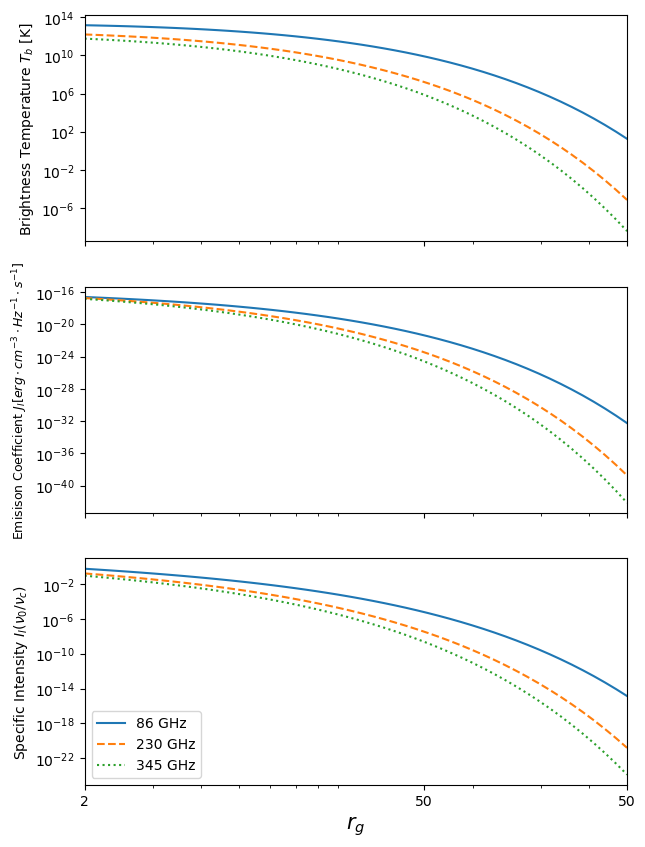

In [37]:
ilp.set_b_params()
plt.figure(1)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex='col', figsize=(7,10))


# subplot 1--------------------------------------------------------------------------------------------------
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(r_array,ilp.profile(r_array, 1), label = "86 GHz")
ax1.plot(r_array,ilp.profile(r_array, 1, nu0=230e9 * ilp.Hz), label = "230 GHz", linestyle='--')
ax1.plot(r_array,ilp.profile(r_array, 1, nu0=345e9 * ilp.Hz), label = "345 GHz", linestyle=':')
ax1.set_ylabel(R'Brightness Temperature $T_b$ [K]',fontsize=10)


# subplot 2--------------------------------------------------------------------------------------------------
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.plot(r_array,j_coeff_func(r_array, 1), label = "86 GHz")
ax2.plot(r_array,j_coeff_func(r_array, 1, nu0=230e9 * ilp.Hz), label = "230 GHz", linestyle='--')
ax2.plot(r_array,j_coeff_func(r_array, 1, nu0=345e9 * ilp.Hz), label = "345 GHz", linestyle=':')

ax2.set_ylabel(R'Emisison Coefficient $J_I [erg \cdot  cm^{-3} \cdot Hz^{-1} \cdot s^{-1}]$',fontsize=9)
#ax2.set_ylabel(R'$J_I [\frac{erg}{cm^{3} \cdot Hz \cdot s}]$',fontsize=15)

# subplot 2--------------------------------------------------------------------------------------------------
ax3.plot(r_array,ilp.synchrotron_func(86e9 * u.Hz / ilp.nu_c_func(r_array)), label = "86 GHz")
ax3.plot(r_array,ilp.synchrotron_func(230e9 * u.Hz / ilp.nu_c_func(r_array)), label = "230 GHz", linestyle='--')
ax3.plot(r_array,ilp.synchrotron_func(345e9 * u.Hz / ilp.nu_c_func(r_array)), label = "345 GHz", linestyle=':')

ax3.legend(loc='lower left')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xticks([2, 15, 50], labels=['2', '50', '50'])

ax3.set_xlabel(R'$r_g$',fontsize=15)
ax3.set_ylabel(R'Specific Intensity $I_I(\nu_0 / \nu_c)$',fontsize=10)

ax1.set_xlim([2,50])

#plt.savefig("./Figures/Figure_1")


Original nth0: 1.0000e+05
Altered nth0:  1.0726e+05
Original te0:  1.2000e+11
Altered te0:   1.2428e+11


<Figure size 640x480 with 0 Axes>

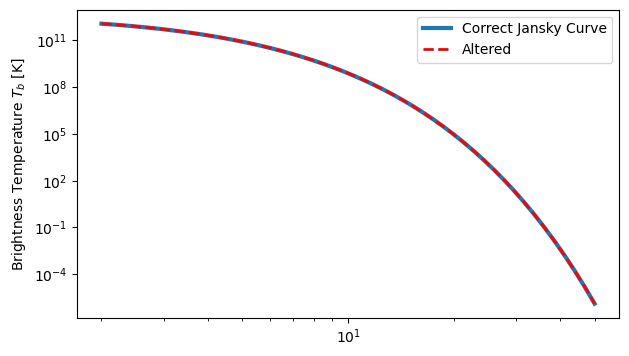

In [3]:
plt.figure(1)
fig, (ax) = plt.subplots(1,1, sharex='col', figsize=(7,4))

# brightparams = [
# 	230e9, # nu0
# 	(MMkg * u.kg).to(u.g).value, # mass
# 	.5, # scale_height
# 	60.0 * (np.pi / 180), # theta_b
# 	1, # beta
#     10, # Rie
# 	0, # Bchoi
# 	2, # rb_0
# 	1.0e5, # n_th0
# 	1.2e11, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp
# ]

brightparams = [
	230e9, # nu0
	(MMkg * u.kg).to(u.g).value, # mass
	.5, # scale_height
	50.0 * (np.pi / 180), # theta_b
	1.0, # beta
	10.0, # Rie
	0, # Bchoice
	2, # rb
	1.23e6, # n_th0
	8.1e9, # t_e0
	-.7, # p_dens
	-.84 # p_temp
]

nth0, te0 = tls.best_fit(1, brightparams[0], brightparams[1], brightparams[2], brightparams[3], brightparams[4], brightparams[5], brightparams[6],brightparams[7],brightparams[10],brightparams[11])
print('Original nth0: ' + '{:.4e}'.format(ilp.kw_n_th0.value))
print('Altered nth0:  ' + '{:.4e}'.format(nth0))
print('Original te0:  ' + '{:.4e}'.format(ilp.kw_t_e0.value))
print('Altered te0:   ' + '{:.4e}'.format(te0))

# subplot 1--------------------------------------------------------------------------------------------------
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(r_array,ilp.profile(r_array, 1), label = "Correct Jansky Curve", linewidth=3)
ax.plot(r_array,ilp.profile(r_array, 1, brightparams[0] * ilp.Hz, brightparams[1]* ilp.grams, brightparams[2], brightparams[3] * ilp.rads, brightparams[4], 
                            brightparams[5], brightparams[6],brightparams[7], nth0 * ilp.cmcubed, te0 * ilp.kelv,
                            brightparams[10],brightparams[11]), label = "Altered", linestyle='--', color='r', linewidth=2)
ax.set_ylabel(R'Brightness Temperature $T_b$ [K]',fontsize=10)
ax.legend()



In [133]:
# Value Tests
ilp.set_b_params()
r = 2
x = ilp.kw_nu0 / ilp.nu_c_func(r)

print('rg_func: ' + str(ilp.rg_func(ilp.kw_mass)))
print('rb_func: ' + str(ilp.rb_func(ilp.kw_mass)))
print('te_func: ' + str(ilp.te_func(r)))
print('theta_e_func: ' + str(ilp.theta_e_func(r)))
print('nth_func: ' + str(ilp.nth_func(r)))
print('b_func_power: ' + str(ilp.b_func_power(r)))
print('b_func_true: ' + str(ilp.b_func_true(r)))
print('nu_c_func: ' + str(ilp.nu_c_func(r)))
print('synchrotron_func: ' + str(ilp.synchrotron_func(x)))
print('profile: ' + str(ilp.profile(r,1)))


rg_func: 983940925287630.8 cm
rb_func: 1967881850575261.5 cm
te_func: 120000000000.0 K
theta_e_func: 20.236440631926616
nth_func: 100000.0 1 / cm3
b_func_power: 17.74389268581136 g(1/2) / (cm(1/2) s)
b_func_true: 21.401713048022387 g(1/2) / (cm(1/2) s)
nu_c_func: 31869864116.897476 Hz
synchrotron_func: 0.15038897809901997
profile: 1135972812229.8674 K


In [12]:
from matplotlib.ticker import AutoMinorLocator

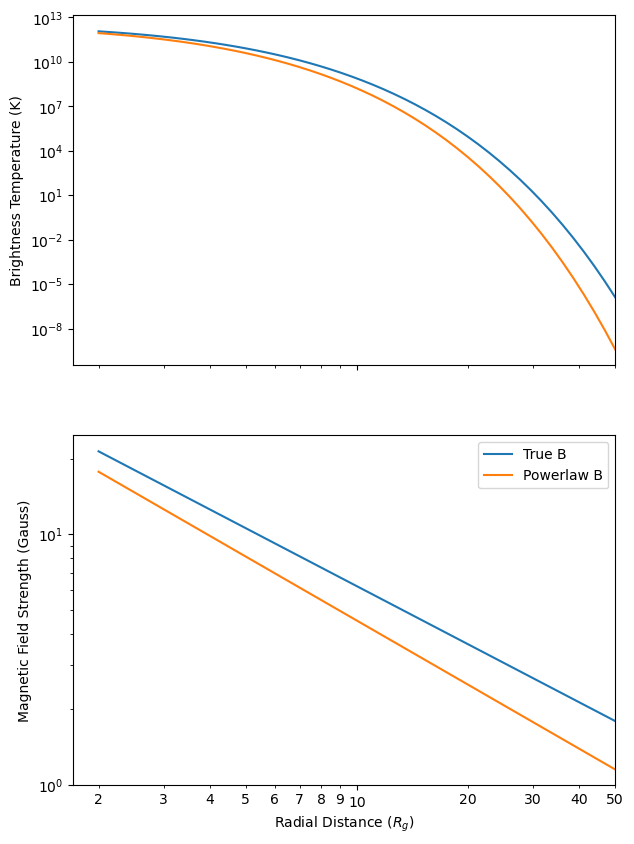

In [25]:
fig = plt.subplots(2,1, sharex='col', figsize=(7,10))
ax = [None, None, None]
ilp.set_b_params()

ax[0] = plt.subplot(2,1,1)
ax[0].plot(r_array,ilp.profile(r_array, 1), label='Altered Equation Profile')
ax[0].plot(r_array,ilp.profile(r_array, 1, Bchoice=1),  label='Power law B Profile')
ax[0].set_ylabel('Brightness Temperature (K)')
plt.yscale('log')




ax[1] = plt.subplot(2,1,2)
plt.xscale('log')
plt.yscale('log')
ax[1].minorticks_on()
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))

# n = 3  # Keeps every 4th label
ax[1].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
# [l.set_visible(False) for (i,l) in enumerate(ax[1].xaxis.get_minorticklabels()) if i % n != 0]
# ax[1].tick_params('both', length=10, width=1, which='major')


ax[1].plot(r_array,ilp.b_func_true(r_array),  label='True B')
ax[1].plot(r_array,ilp.b_func_power(r_array, 1), label='Powerlaw B')
ax[1].set_ylabel('Magnetic Field Strength (Gauss)')
ax[1].set_xlabel('Radial Distance' + R' ($R_g$)')
ax[1].set_xlim([0,50])



plt.legend()


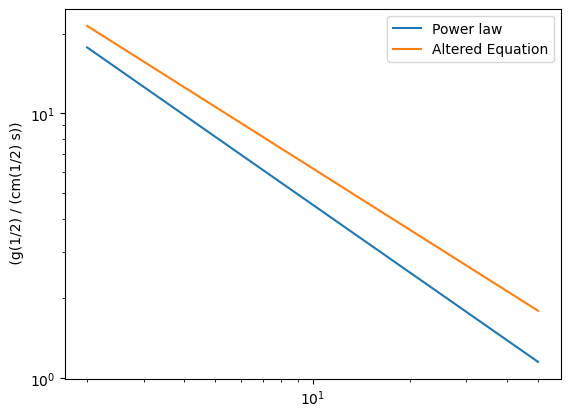

In [135]:
# Line of Best Fit
tls.plot_with_units(r_array,ilp.b_func_power(r_array), label='Power law')
tls.plot_with_units(r_array,ilp.b_func_true(r_array),  label='Altered Equation')
plt.xscale('log')
plt.yscale('log')
plt.legend()


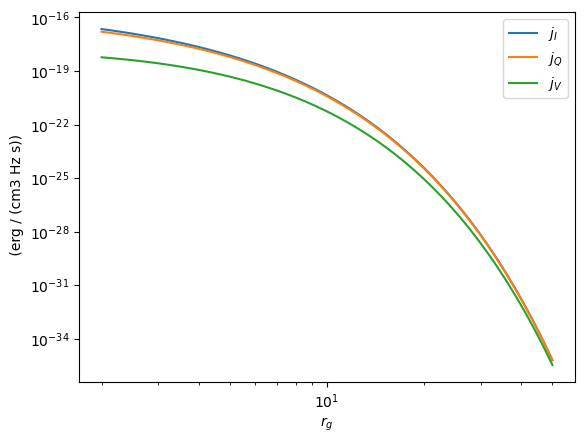

In [20]:

tls.plot_with_units(r_array,ilp.temp_jcoeff_I(r_array, 1), label=R'$j_I$')
tls.plot_with_units(r_array,ilp.temp_jcoeff_Q(r_array, 1), label=R'$j_Q$')
tls.plot_with_units(r_array,ilp.temp_jcoeff_V(r_array, 1), label=R'$j_V$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(R'$r_g$')
plt.legend()
plt.savefig('Test for polarization')

In [9]:
11 % 6

5